In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

shots = pd.read_json('shots_22_23.json')
players = pd.read_json('players_22_23.json')
teams = pd.read_json('teams_22_23.json')

maxX = 1024 # First half 1 - 512
maxY = 514  # Half line 257

# Lines for field plots


shots['ShotX_side'] = 0
shots['ShotY_side'] = 0

def calcxy(x,y): # Recalculate X and Y to one side

    if x >= 512:
        x2 = maxX - x
        y2 = maxY - y
    else:
        x2 = x
        y2 = y
        
    return (x2, y2)

for nr in range(len(shots)):

    x = float(shots['ShotX'].iloc[nr])
    y = float(shots['ShotY'].iloc[nr])
    (x2, y2) = calcxy(x,y)
    shots['ShotX_side'].iloc[nr] = x2
    shots['ShotY_side'].iloc[nr] = y2



/Users/mikkoalanko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


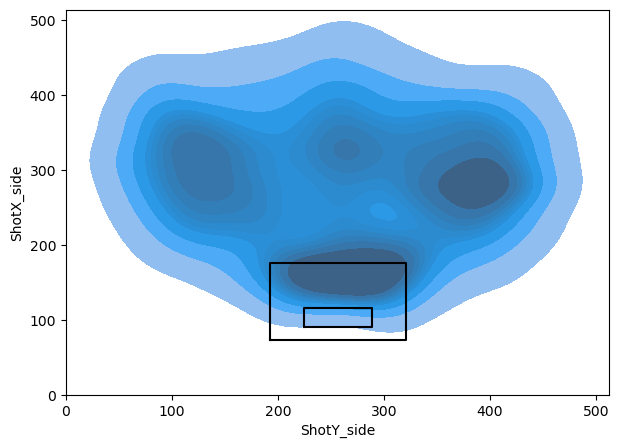

In [134]:
# All shots

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

# Draw bigger goalie area
y = [72.96, 72.96, 175.36, 175.36, 72.96]
x = [192.75, 321.25, 321.25, 192.75, 192.75]
plt.plot(x,y,color="black")

# Draw smaller goalie area
y = [89.6, 89.6, 115.2, 115.2, 89.6]
x = [224.875, 289.125, 289.125, 224.875, 224.875]
plt.plot(x,y,color="black")

sns.kdeplot(shots["ShotY_side"], shots["ShotX_side"], shade="True")
plt.ylim(0, maxY)
plt.xlim(0, maxX/2)
plt.show()

/Users/mikkoalanko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


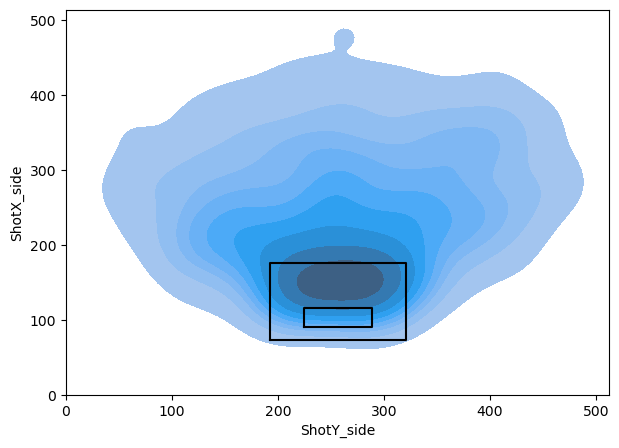

In [129]:
# All Goals

goals = shots[(shots['EventType'] == 1)]

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

# Draw bigger goalie area
y = [72.96, 72.96, 175.36, 175.36, 72.96]
x = [192.75, 321.25, 321.25, 192.75, 192.75]
plt.plot(x,y,color="black")


# Draw smaller goalie area
y = [89.6, 89.6, 115.2, 115.2, 89.6]
x = [224.875, 289.125, 289.125, 224.875, 224.875]
plt.plot(x,y,color="black")

sns.kdeplot(goals["ShotY_side"], goals["ShotX_side"], shade="True")
plt.ylim(0, maxY)
plt.xlim(0, maxX/2)
plt.show()

90


/Users/mikkoalanko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mikkoalanko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


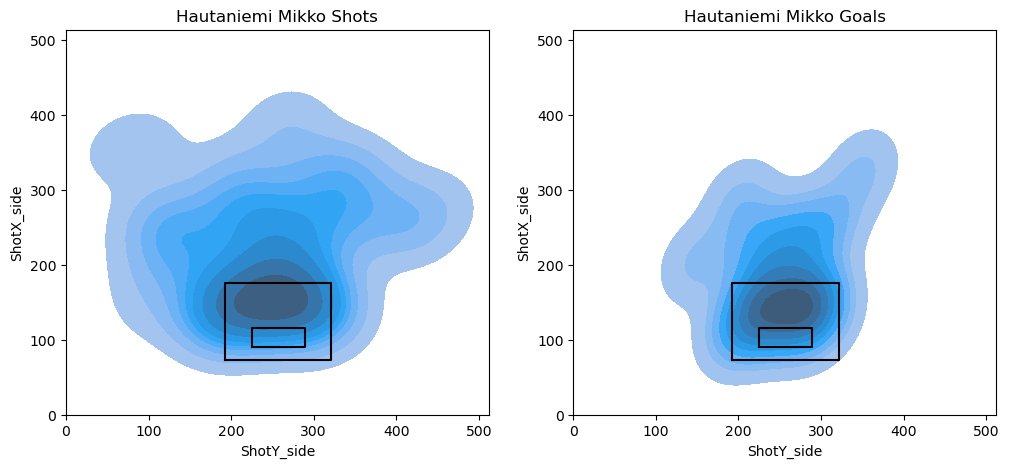

In [170]:
# Shots and Goals by Player

player_name = 'Hautaniemi Mikko'
player_id = players[(players['PlayerName'] == player_name)]
playershots = shots[(shots['ShootingPlayerID'] == player_id.iloc[0,0])]
playergoals = shots[(shots['ShootingPlayerID'] == player_id.iloc[0,0]) & (shots['EventType'] == 1) & (shots['Goaltype'] != "TM")] 

print(len(playershots.index))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

#Plot One - Shots by Team

plt.subplot(121)

# Draw bigger goalie area
y = [72.96, 72.96, 175.36, 175.36, 72.96]
x = [192.75, 321.25, 321.25, 192.75, 192.75]
plt.plot(x,y,color="black")

# Draw smaller goalie area
y = [89.6, 89.6, 115.2, 115.2, 89.6]
x = [224.875, 289.125, 289.125, 224.875, 224.875]
plt.plot(x,y,color="black")
plt.ylim(0, maxY)
plt.xlim(0, maxX/2)
plt.title(player_name +' Shots')
sns.kdeplot(playershots["ShotY_side"], playershots["ShotX_side"], shade="True")

#Plot Two - Goals by Player

plt.subplot(122)

# Draw bigger goalie area
y = [72.96, 72.96, 175.36, 175.36, 72.96]
x = [192.75, 321.25, 321.25, 192.75, 192.75]
plt.plot(x,y,color="black")

# Draw smaller goalie area
y = [89.6, 89.6, 115.2, 115.2, 89.6]
x = [224.875, 289.125, 289.125, 224.875, 224.875]
plt.plot(x,y,color="black")
plt.ylim(0, maxY)
plt.xlim(0, maxX/2)
plt.title(player_name +' Goals')
sns.kdeplot(playergoals["ShotY_side"], playergoals["ShotX_side"], shade="True")

plt.show()

/Users/mikkoalanko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mikkoalanko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


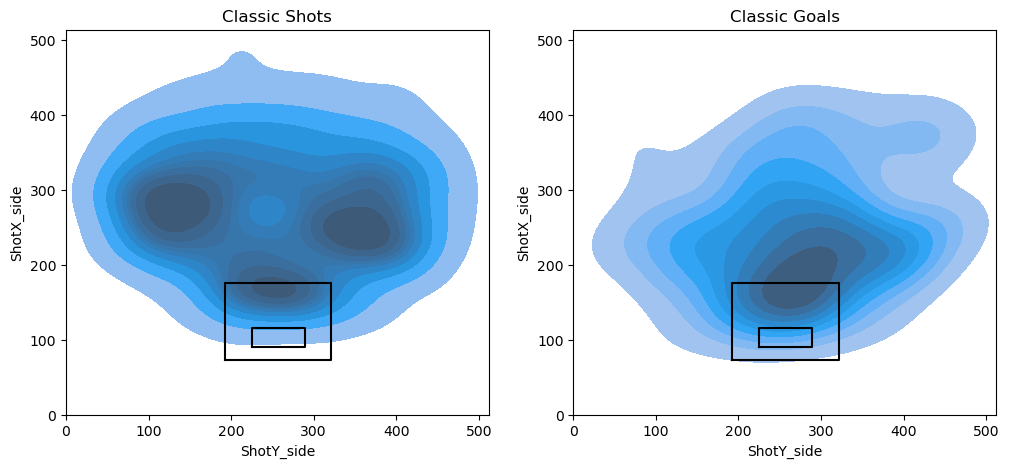

In [166]:
# Shots and Goals by Team

team_name = 'Classic'
team_id = teams[(teams['Team'] == team_name)]
teamshots = shots[(shots['ShootingTeamID'] == team_id.iloc[0,0])] 
teamgoals = shots[(shots['ShootingTeamID'] == team_id.iloc[0,0]) & (shots['EventType'] == 1) & (shots['Goaltype'] != "TM")] 

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

#Plot One - Shots by Team
plt.subplot(121)
# Draw bigger goalie area
y = [72.96, 72.96, 175.36, 175.36, 72.96]
x = [192.75, 321.25, 321.25, 192.75, 192.75]
plt.plot(x,y,color="black")

# Draw smaller goalie area
y = [89.6, 89.6, 115.2, 115.2, 89.6]
x = [224.875, 289.125, 289.125, 224.875, 224.875]
plt.plot(x,y,color="black")
plt.ylim(0, maxY)
plt.xlim(0, maxX/2)
plt.title(team_name +' Shots')
sns.kdeplot(teamshots["ShotY_side"], teamshots["ShotX_side"], shade="True")

#Plot Two - Goals by Team

plt.subplot(122)

# Draw bigger goalie area
y = [72.96, 72.96, 175.36, 175.36, 72.96]
x = [192.75, 321.25, 321.25, 192.75, 192.75]
plt.plot(x,y,color="black")

# Draw smaller goalie area
y = [89.6, 89.6, 115.2, 115.2, 89.6]
x = [224.875, 289.125, 289.125, 224.875, 224.875]
plt.plot(x,y,color="black")
plt.ylim(0, maxY)
plt.xlim(0, maxX/2)
plt.title(team_name +' Goals')
sns.kdeplot(teamgoals["ShotY_side"], teamgoals["ShotX_side"], shade="True")

plt.show()

teams.columns